Pandas Practice 1

In [ ]:
dt = {   "Name":["Shree","Rahul","Vishal","Nigel"],
         "ID":[1,2,3,4],
         "Department":["Architect Group","Database Group","Software Group","Sales Group"],
         "Salary":[500000,400000,300000,350000]
     }

In [ ]:
import pandas as pd
df = pd.DataFrame(dt)
df

In [ ]:
x=df[["ID"]]
print(type(x))
print(x.dtypes)

In [ ]:
y=df["ID"]
print(type(y))
print(y.dtypes)

In [ ]:
df[["ID","Name","Department"]]

In [ ]:
df.set_index("Name",inplace=True)

In [ ]:
df

In [ ]:
print("ID of Shree : ",df.loc["Shree","ID"],end="\n\n")
print(df.loc["Shree":"Vishal","ID"],end="\n\n")
print(df.iloc[0:2,0],end="\n\n")
print("Salary of Vishal : ",df.iloc[2,2])

In [ ]:
print("first 3 rows using iloc[]\n",df.iloc[0:3],end="\n\n")
print("first 3 rows using loc[]\n",df.loc["Shree":"Vishal"],end="\n\n")

---
---

Pandas Practice 2

In [ ]:
import pandas as pd
path = "../docs/TopSellingAlbums.csv"
df = pd.read_csv(path)
df.head()

In [ ]:
y=df[["Artist","Album","Genre"]].head()

In [ ]:
print(df.loc[0:4,"Album"],end="\n\n")
print(df.iloc[0:5,1],end="\n\n")

In [ ]:
df.set_index("Artist").head(2)

In [ ]:
path2 = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%204/Datasets/TopSellingAlbums.xlsx"
df2 = pd.read_excel(path2)
df2.head()

In [ ]:
y.set_index("Artist",inplace=True)
y

In [ ]:
print(df.iloc[1,2])
print(df.iloc[0,2])
print(df.iloc[0,0])

In [ ]:
print(df.loc[1,"Released"])
print(df.loc[0,"Released"])
print(df.loc[0,"Artist"])

In [ ]:
df.loc[0:5,"Album":"Soundtrack"]

In [ ]:
df.iloc[0:5,0:8]

In [ ]:
df[df.loc[:,"Rating"]<9]

In [ ]:
df[df.loc[:,"Artist"]=="Pink Floyd"]

In [ ]:
df.shape

In [ ]:
df.index=['A','B','C','D','E','F','G','H']
df

---
---

Simple API 2

In [ ]:
import pandas as pd
path2 = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%204/Datasets/TopSellingAlbums.xlsx"
df2 = pd.read_excel(path2)
df2.head(2)

In [ ]:
mean = df2[["Music Recording Sales (millions)"]].mean()
print("Average Music Recording Sales : ",mean,end="\n\n")

creating datafframes from nested lists

In [ ]:
l = [[1,"Shree","DataBase Group",500000],
     [2,"Rahul","DataBase Group",200000],
     [3,"Nigel","Sales Group","350000"],
     [4,"Vineeth","Engineering Group","400000"]]
df3 = pd.DataFrame(l,columns=["ID","Name","Department","Salary"])
df3

In [ ]:
df3[["Department","Salary"]].groupby("Department",as_index=False).sum()
df3[["Department","Salary"]].groupby("Department").agg(["min","max","first","last"])

In [ ]:
df3[["Salary"]] = df3[["Salary"]].astype("int")

In [ ]:
df3[["Salary"]].apply(lambda d: d/2)

---

bitcoin prices

In [1]:
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
from plotly.offline import plot

In [2]:
c = CoinGeckoAPI()

In [3]:
data = c.get_coin_market_chart_by_id(id="bitcoin",vs_currency="usd",days=30)

In [4]:
import pandas as pd
df = pd.DataFrame(data['prices'],columns=["TimeStamp","Prices"])
df.head()

,TimeStamp,Prices
0,1682521201120,29672.992700
1,1682524903452,29813.783576
2,1682528467788,29794.322659
3,1682532038064,29777.229111
4,1682535670497,29742.404829


In [5]:
import datetime
df['Date']=df["TimeStamp"].apply(lambda d: datetime.date.fromtimestamp(d/1000))

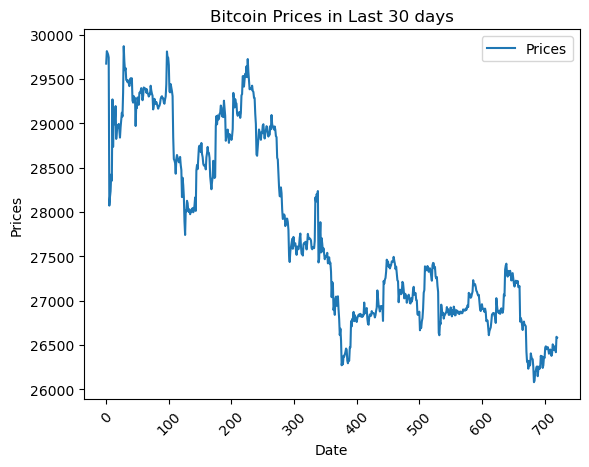

In [27]:
import matplotlib.pyplot as plt
df[["Prices","Date"]].plot()
plt.title("Bitcoin Prices in Last 30 days")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Prices")
plt.show()

In [ ]:
# view peice range for each date
df[["Prices","Date"]].groupby("Date",as_index=False).mean()
cdata = df[["Prices","Date"]].groupby("Date",as_index=False).agg({"Prices":["min","max","first","last"]})

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=cdata["Date"],
    open=cdata["Prices"]["first"],
    close=cdata["Prices"]["last"],
    low=cdata["Prices"]["min"],
    high=cdata["Prices"]["max"]
)])
fig.update_layout(xaxis_rangeslider_visible=False,xaxis_title="Date",yaxis_title="Prices(USD)",title="Bitcoin Prices over last 30 days")
plot(fig)

---
---

HTTP Requests and Responses

In [ ]:
import requests

In [ ]:
url="https://www.hackerrank.com/dashboard"
r= requests.get(url)

In [ ]:
print(r.content)

In [ ]:
print("Request Headers  : ",r.request.headers,end="\n\n")
print("Request Body : ",r.request.body,end="\n\n")
print("Response Headers : ",r.headers,end="\n\n")

resp_header = r.headers
print("Content Type : ",resp_header["Content-Type"],end="\n\n")
print("Text Format : \n",r.text[0:300],end="\n\n")

importing images

In [ ]:
import requests
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png"
url2 = "https://images.unsplash.com/photo-1601247387326-f8bcb5a234d4?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=871&q=80"
r_img = requests.get(url2)

In [ ]:
r_img.content
print("Text Format : \n",r_img.text[0:950],end="\n\n")

In [ ]:
print("Request Headers  : ",r_img.request.headers,end="\n\n")
print("Request Body : ",r_img.request.body,end="\n\n")
print("Response Headers : ",r_img.headers,end="\n\n")
print("URL : ",r_img.url,end="\n\n")

resp_header = r_img.headers
print("Content Type : ",resp_header["Content-Type"],end="\n\n")
print("Encoding : ",r_img.encoding,end="\n\n")

In [ ]:
import os
from PIL import Image

In [ ]:
path = os.path.join(os.getcwd(),'image.png')
print("Path : ",path,end="\n\n")
with open(path,"wb") as file:
    file.write(r_img.content)

In [ ]:
Image.open(path)

GET method with URL parameters

In [ ]:
import requests
url3 = "http://httpbin.org/get"
paramter = {"Name":"Shree","ID":"1015"}
r_get = requests.get(url3,params=paramter)

In [ ]:
print("Requests header : ",r_get.request.headers,end="\n\n")
print("Requests body : ",r_get.request.body,end="\n\n")
print("Response header : ",r_get.headers,end="\n\n")
print("Response encoding : ",r_get.encoding,end="\n\n")

headers = r_get.headers
print("Content Type : ",headers["Content-Type"],end="\n\n")
print("URL : ",r_get.url,end="\n\n")

In [ ]:
print("Contents : ",r_get.content,end="\n\n")
print("JSON to Dictionary : ",r_get.json(),end="\n\n")

cont = r_get.json()
print("arguments : ",cont["args"],end="\n\n")
print("origin : ",cont["origin"],end="\n\n")

POST method with URL parameters

In [ ]:
url4 = " http://httpbin.org/post"
paramter = {"Name":"Shree","ID":"1015"}
r_post = requests.post(url4,data = paramter)

In [ ]:
print("Requests header : ",r_post.request.headers,end="\n\n")
print("Requests body : ",r_post.request.body,end="\n\n")
print("Response header : ",r_post.headers,end="\n\n")
print("Response encoding : ",r_post.encoding,end="\n\n")

headers = r_post.headers
print("Content Type : ",headers["Content-Type"],end="\n\n")
print("URL : ",r_post.url,end="\n\n")

print("Contents : ",r_post.content,end="\n\n")
print("JSON to Dictionary : ",r_post.json(),end="\n\n")

cont = r_post.json()
print("arguments : ",cont["args"],end="\n\n")
print("origin : ",cont["origin"],end="\n\n")
print("form : ",cont["form"],end="\n\n")

In [ ]:
r_get.status_code

importing files

In [ ]:
path = os.path.join(os.getcwd(),'file.txt')
path

In [ ]:
r_text = requests.get("https://example-files.online-convert.com/document/txt/example.txt")
print("Requests header : ",r_text.request.headers,end="\n\n")
print("Requests body : ",r_text.request.body,end="\n\n")
print("Response header : ",r_text.headers,end="\n\n")
print("Response encoding : ",r_text.encoding,end="\n\n")

headers = r_text.headers
print("Content Type : ",headers["Content-Type"],end="\n\n")
print("URL : ",r_text.url,end="\n\n")

print("Contents : ",r_text.content,end="\n\n")
# print("bytes to text : ",r_text.text,end="\n\n")

In [ ]:
with open(path,"wb") as wfile:
    wfile.write(r_text.content)
with open(path,"r") as rfile:
    print(rfile.read())

___

___

## More APIs

In [ ]:
!pip install randomuser

In [1]:
from randomuser import RandomUser
import pandas as pd

In [2]:
ru = RandomUser()
ru

In [12]:
list_ = ru.generate_users(10)
data = {"Name":[],"City":[],"DoB":[],"Email":[],"Cell":[],"Street":[],"State":[],"Zip_Code":[]}
for i,j in enumerate(list_):
    
    data["Name"].append(j.get_full_name())
    data["City"].append(j.get_city())
    data["DoB"].append(j.get_dob())
    data["Email"].append(j.get_email())
    data["Cell"].append(j.get_cell())
    data["Street"].append(j.get_street())
    data["State"].append(j.get_state())
    data["Zip_Code"].append(j.get_zipcode())
df = pd.DataFrame(data)
df

,Name,City,DoB,Email,Cell,Street,State,Zip_Code
0,Emily Burke,Athlone,1995-08-30T00:24:40.056Z,emily.burke@example.com,081-817-2253,7181 O'Connell Avenue,Tipperary,20103
1,Lumi Jarvela,Lappajärvi,1976-01-19T09:29:33.342Z,lumi.jarvela@example.com,049-947-65-23,9671 Itsenäisyydenkatu,Finland Proper,54684
2,Rahel Keitel,Neuburg-Schrobenhausen,1978-12-09T23:13:39.406Z,rahel.keitel@example.com,0179-7798618,2261 Neue Straße,Nordrhein-Westfalen,88126
3,Elmer Lucas,Roscommon,1983-01-14T06:46:25.360Z,elmer.lucas@example.com,081-193-0366,1619 Albert Road,Westmeath,56261
4,Addison Ginnish,Port Elgin,1959-06-04T03:35:59.750Z,addison.ginnish@example.com,072-614-4364,6222 Queen St,British Columbia,G0C 6O7
5,Shaun Boyd,Wells,1981-11-09T23:16:19.913Z,shaun.boyd@example.com,0723-546-101,997 North Road,Devon,T00 4UW
6,Raphaël Lecomte,Aulnay-sous-Bois,1981-09-15T21:04:32.496Z,raphael.lecomte@example.com,06-29-34-49-31,5568 Rue du Bon-Pasteur,Loiret,16637
7,Benjamin Morris,Greymouth,1960-10-24T06:39:55.408Z,benjamin.morris@example.com,(443)-070-2374,1894 New North Road,Hawke'S Bay,10842
8,Lamberdina De Smidt,Zeist,1959-02-01T14:09:49.354Z,lamberdina.desmidt@example.com,(06) 88834924,595 Kolderveense Bovenboer,Limburg,9038 CN
9,Jula Boone,Papenvoort,1993-04-24T03:44:40.910Z,jula.boone@example.com,(06) 09505179,8794 Jan Reitsmastraat,Friesland,3674 GZ


In [26]:
df.drop(["DoB"])

KeyError: "['DoB'] not found in axis"

In [29]:
l = list(df['DoB'])
df2 = pd.to_datetime(l)
df2 = pd.DataFrame(df2)
df2 = df2[0].dt.date
type(df2)
df["Date"] = df2

In [32]:
df.drop("DoB",axis=1)

,Name,City,Email,Cell,Street,State,Zip_Code,Date
0,Emily Burke,Athlone,emily.burke@example.com,081-817-2253,7181 O'Connell Avenue,Tipperary,20103,1995-08-30
1,Lumi Jarvela,Lappajärvi,lumi.jarvela@example.com,049-947-65-23,9671 Itsenäisyydenkatu,Finland Proper,54684,1976-01-19
2,Rahel Keitel,Neuburg-Schrobenhausen,rahel.keitel@example.com,0179-7798618,2261 Neue Straße,Nordrhein-Westfalen,88126,1978-12-09
3,Elmer Lucas,Roscommon,elmer.lucas@example.com,081-193-0366,1619 Albert Road,Westmeath,56261,1983-01-14
4,Addison Ginnish,Port Elgin,addison.ginnish@example.com,072-614-4364,6222 Queen St,British Columbia,G0C 6O7,1959-06-04
5,Shaun Boyd,Wells,shaun.boyd@example.com,0723-546-101,997 North Road,Devon,T00 4UW,1981-11-09
6,Raphaël Lecomte,Aulnay-sous-Bois,raphael.lecomte@example.com,06-29-34-49-31,5568 Rue du Bon-Pasteur,Loiret,16637,1981-09-15
7,Benjamin Morris,Greymouth,benjamin.morris@example.com,(443)-070-2374,1894 New North Road,Hawke'S Bay,10842,1960-10-24
8,Lamberdina De Smidt,Zeist,lamberdina.desmidt@example.com,(06) 88834924,595 Kolderveense Bovenboer,Limburg,9038 CN,1959-02-01
9,Jula Boone,Papenvoort,jula.boone@example.com,(06) 09505179,8794 Jan Reitsmastraat,Friesland,3674 GZ,1993-04-24


## Another API

In [ ]:
import requests
import pandas as pd
url = "https://fruityvice.com/api/fruit/all"
r = requests.get(url)

In [ ]:
df = pd.json_normalize(r.json())
df.columns

In [ ]:
df.columns = ['Name', 'ID', 'Family', 'Order', 'Genus', 'Calories',
       'Fat', 'Sugar', 'Carbohydrates',
       'Protein']

In [ ]:
df.head()

In [ ]:
df.rename(columns={"Name":"Fruit Name"},inplace=True)
df.head()

In [ ]:
# another way in which above can be done
import json
pd.json_normalize(json.loads(r.text))

---
---